## Решение стационарного уравнения Фоккера-Планка

## Решение уравнения Фоккера-Планка для эволюции функции плотности вероятности методом замены переменной

Необходимо найти решение уравнения Фоккера-Планка

$$\frac{\partial}{\partial t} p(x,t) = \frac{\partial^2}{\partial x^2}(\sigma(x) \cdot p(x,t)) - \frac{\partial}{\partial x}(\mu(x) \cdot p(x,t))$$

при условии, что решение стационарного уравнения:

$$q(x) = N \cdot e^{-\int f(x) dx}$$

задано теми же параметрическими функциями:

$$f(x) = \frac{\frac{\partial}{\partial x} \sigma(x) - \mu(x)}{\sigma(x)}$$

Решение рассматриваемого уравнения Фоккера-Планка представимо в следующем виде:

$$p(x,t) = u(\varphi(x), t) \cdot \frac{\partial}{\partial x} \varphi(x)$$

,где

$$\varphi(x) = \int N \cdot e^{-\int f(x) dx} dx = \int q(x)$$

а $u(x,t)$ является решением уравнения тепловой диффузии:

$$\frac{\partial}{\partial t} u(x,t)=\frac{\partial^2}{\partial x^2}u(x,t)$$

Заметим, что выражение для $p(x,t)$ можно упростить

$$p(x,t) = u(\varphi(x), t) \cdot \frac{\partial}{\partial x} \varphi(x) = u(\varphi(x), t) \cdot q(x)$$

В качестве решения исходного уравнения важно получить функцию эволюции, которая при $t \to \infty$ сходится к решению стационарного уравнения, т.е.

$$\lim_{t \to \infty} p(x,t) = \lim_{t \to \infty} \left[ u(\varphi(x), t) \cdot q(x) \right] = q(x)$$

Следовательно, необходимо, чтобы $\lim_{t \to \infty} u(\varphi(x), t) = 1$, что без потери общности сводится к следующему выражению:

$$\lim_{t \to \infty} u((x, t) = 1$$

### Частное решение уравнения тепловой диффузии

Существет только одно частное решение уравнения тепловой диффузии, при котором получается пригодное решение исходного уравнения Фоккер-Планка с точки зрения условия сходимости и определенности в начальный момент времени. Данное решение представлено следующей функцией:

$$u(x,t) = A \cdot exp(-k^2 \cdot t) \cdot cos(k \cdot x + B) + C$$

Покажем, что оно сходится к стационарному

$$\lim_{t \to \infty} u(x,t) = C + A \cdot cos(k \cdot x + B) \cdot \lim_{t \to \infty} exp(-k^2 \cdot t) = C + A \cdot cos(k \cdot x + B) \cdot 0 = C$$

Таким образом при $C = 1$ решение удовлетворяет условию сходимости, также очевидно, что решение существует в начальный момент времени $t = 0$. Итак, искомое решение уравнения тепловой диффузии и уравнения Фоккера-Планка могут быть представлены в виде следующих фукций:

$$u(x,t) = A \cdot exp(-k^2 \cdot t) \cdot cos(k \cdot x + B) + 1$$

$$p(x,t) = q(x) \cdot u(\varphi(x), t) = q(x) \cdot \left[A \cdot exp(-k^2 \cdot t) \cdot cos(k\int q(x) dx + B) + 1 \right]$$

или можно записать в следующей форме:

$$p(x,t,k) = q(x) \cdot \left[A \cdot exp(-k^2 \cdot t) \cdot cos(k\int^x_0 q(\xi) d\xi + B) + 1 \right]$$

Если выразить $B$

$$p(x,t,k) = q(x) \cdot \left[1 + A \cdot exp(-k^2 \cdot t) \cdot sin\left[(k \cdot (\frac{1}{2} - \int^x_0 q(\xi) d\xi) \right] \right]$$


### Эксперимент

Реализуем функцию $q(x)$ в экспоненциальном виде $q(x) = exp(\sum_{i=0}^{N} \alpha_i x^i)$

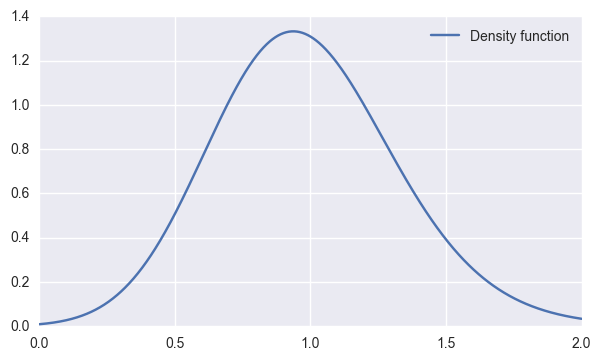

In [12]:
%matplotlib inline

import seaborn
seaborn.mpl.rcParams['figure.figsize'] = (7.0, 4.0)
seaborn.mpl.rcParams['savefig.dpi'] = 100

import scipy.integrate as integrate

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

def create_distribution_pdf(params):
    def st_distr_pdf(x):
        f = 0
        for (i, param) in enumerate(params[2:]):
            f += param * x**i
        return np.exp(f)
    A = params[0]
    k = params[1]
    def distr_pdf(x, t):
        return st_distr_pdf(x) * (1 + A * np.exp(-k**2 * t) * np.sin(k * (0.5 - integrate.quad(st_distr_pdf, 0, x))))
    return distr_pdf

params = [1/3, 3 * np.pi, -4.692, 11.688, -7.936, 1.209]

pdf = create_distribution_pdf(params)

x = np.linspace(0, 2.5, 1500)
t = np.linspace(0, 0.5, 500)

T = []
X = []
F = []

for i in range(x.shape[0]):
    for j in range(t.shape[0]):
        T.append(t[j])
        X.append(x[i])
        F.append(pdf(x[i], t[j]))
        


ax = pd.Series(y, x).plot(label='Density function', legend=True)

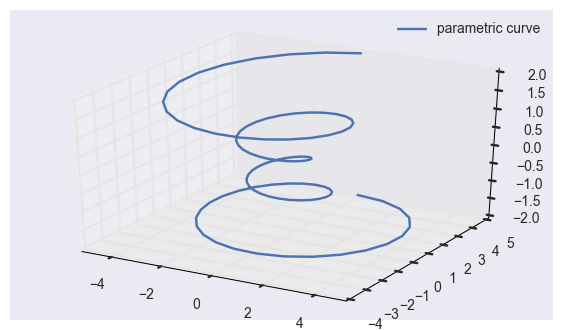

In [13]:


import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
ax.plot(x, y, z, label='parametric curve')
ax.legend()

plt.show()

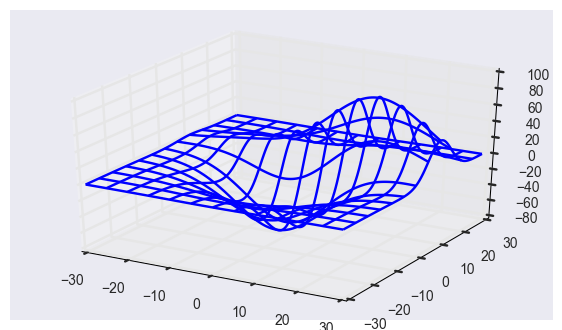

In [14]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()


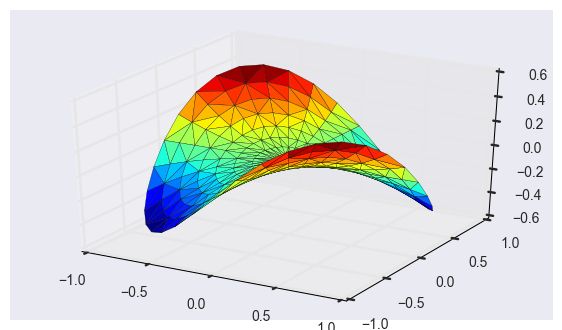

In [16]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

n_angles = 36
n_radii = 8

# An array of radii
# Does not include radius r=0, this is to eliminate duplicate points
radii = np.linspace(0.125, 1.0, n_radii)

# An array of angles
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)

# Repeat all angles for each radius
angles = np.repeat(angles[...,np.newaxis], n_radii, axis=1)

# Convert polar (radii, angles) coords to cartesian (x, y) coords
# (0, 0) is added here. There are no duplicate points in the (x, y) plane
x = np.append(0, (radii*np.cos(angles)).flatten())
y = np.append(0, (radii*np.sin(angles)).flatten())

# Pringle surface
z = np.sin(-x*y)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_trisurf(x, y, z, cmap=cm.jet, linewidth=0.2)

plt.show()


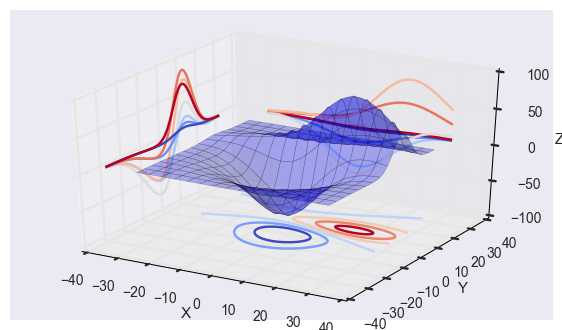

In [15]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contour(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_xlim(-40, 40)
ax.set_ylabel('Y')
ax.set_ylim(-40, 40)
ax.set_zlabel('Z')
ax.set_zlim(-100, 100)

plt.show()